<h2 align=center> Principal Component Analysis</h2>

### Task 1: Load the Data and Libraries
---

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [4]:
df.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [5]:
### rename the columns 
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.head()


,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
### check for na and duplicates
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
df.duplicated().sum()
df.dropna(inplace=True)

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  149 non-null    float64
 1   sepal width   149 non-null    float64
 2   petal length  149 non-null    float64
 3   petal width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


(149, 5)

### Task 3: Visualize the Data
---

<Axes: xlabel='sepal length', ylabel='sepal width'>

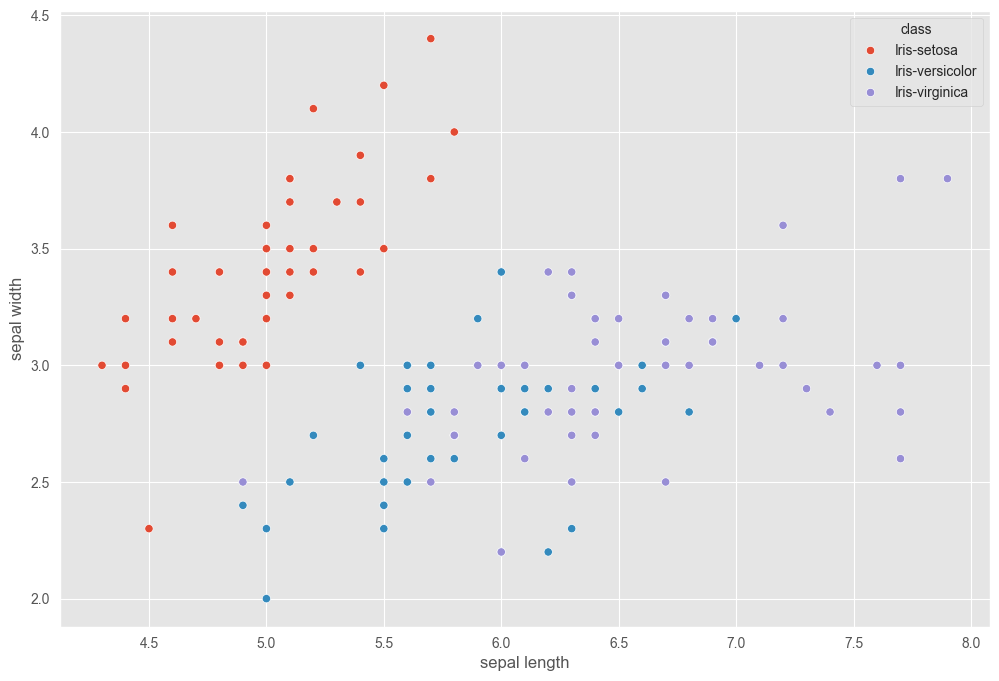

In [9]:
sns.scatterplot(x='sepal length', y='sepal width', hue='class', data=df)
##we have so much over lap in the variables 

### Task 4: Standardize the Data
---

In [10]:
## define our dep and indp
x=df.iloc[:,0:4].values
y=df['class'].values

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [12]:
cov_matrix = np.cov(x, rowvar=False)
cov_matrix

array([[ 1.00675676, -0.10448539,  0.87716999,  0.82249094],
       [-0.10448539,  1.00675676, -0.41802325, -0.35310295],
       [ 0.87716999, -0.41802325,  1.00675676,  0.96881642],
       [ 0.82249094, -0.35310295,  0.96881642,  1.00675676]])

In [13]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[2.92442837 0.93215233 0.14946373 0.02098259]

Eigenvectors:
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

### Task 6: Singular Value Decomposition (SVD)
---

In [14]:
# Perform SVD
U, S, Vt = np.linalg.svd(x)

# Note: Vt is the transpose of V, which is often used in practice

print("U matrix:")
print(U)

print("\nS matrix:")
print(np.diag(S))  # Convert S to a diagonal matrix for easier viewing

print("\nV transpose matrix:")
print(Vt)

U matrix:
[[-1.01323228e-01 -5.48526152e-02 -4.86404082e-02 ...  6.02782520e-02
   7.41017006e-02  3.88587837e-02]
 [-1.14783048e-01 -2.60381513e-02  1.05611016e-02 ...  2.11304386e-03
  -6.93869691e-02  1.89285545e-02]
 [-1.11750383e-01 -4.79264006e-02  2.06543001e-02 ... -8.90400058e-03
  -1.71769951e-01 -1.44902735e-01]
 ...
 [ 7.25456290e-02  2.25281606e-02  3.81463035e-02 ...  9.89021018e-01
  -1.65548516e-02 -2.85237140e-03]
 [ 6.58086084e-02  8.64869575e-02  1.98026079e-01 ... -1.40860762e-02
   9.48037843e-01 -2.45045850e-02]
 [ 4.55101695e-02 -1.85780324e-03  1.12395728e-01 ... -1.53104726e-04
  -2.29804954e-02  9.77053974e-01]]

S matrix:
[[20.80421589  0.          0.          0.        ]
 [ 0.         11.74557554  0.          0.        ]
 [ 0.          0.          4.70325768  0.        ]
 [ 0.          0.          0.          1.76222125]]

V transpose matrix:
[[ 0.52308496 -0.25956935  0.58184289  0.56609604]
 [ 0.36956962  0.92681168  0.01912775  0.06381646]
 [-0.72154279  

In [15]:
for val in eigenvalues:
    print(val)

2.9244283691111135
0.9321523302535066
0.1494637348981336
0.02098259276427038


### Task 7: Picking Principal Components Using the Explained Variance
---

In [16]:
### calculating the variance that capture by our pca
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
pca.fit(x)

pca.explained_variance_ratio_
### we see that the first two can be so good

array([0.72620033, 0.23147407, 0.03711516, 0.00521044])

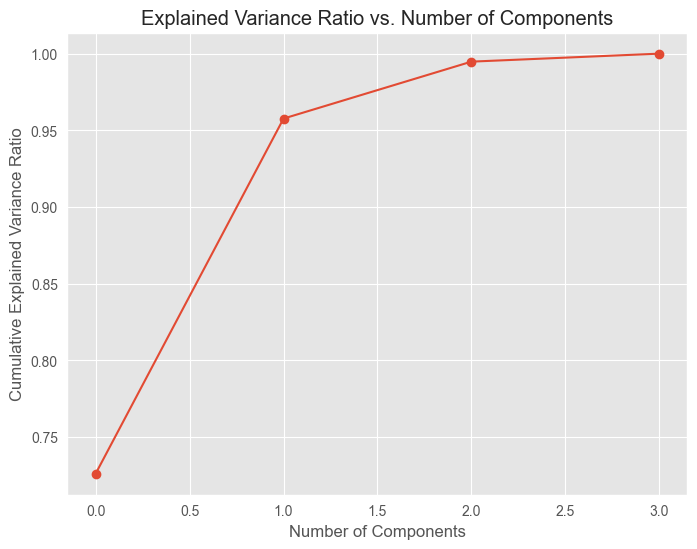

In [17]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [18]:
eigenvectors

array([[ 0.52308496, -0.36956962, -0.72154279,  0.26301409],
       [-0.25956935, -0.92681168,  0.2411952 , -0.12437342],
       [ 0.58184289, -0.01912775,  0.13962963, -0.80099722],
       [ 0.56609604, -0.06381646,  0.63380158,  0.52321917]])

In [19]:
projection_matrix=(eigenvectors.T[:][:])[:2].T
projection_matrix


array([[ 0.52308496, -0.36956962],
       [-0.25956935, -0.92681168],
       [ 0.58184289, -0.01912775],
       [ 0.56609604, -0.06381646]])

In [20]:
x_pca=x.dot(projection_matrix)
x_pca

array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

In [21]:
# Assuming pca is the PCA object fitted to your data
num_components = 2  # Number of principal components to retain

# Project data onto lower-dimensional subspace
projected_data = pca.transform(x)[:, :num_components]

# Convert the projected data into a DataFrame
projected_df = pd.DataFrame(projected_data, columns=['PC1', 'PC2'])

# Add the 'class' column from the original DataFrame to the projected DataFrame
projected_df['class'] = df['class']


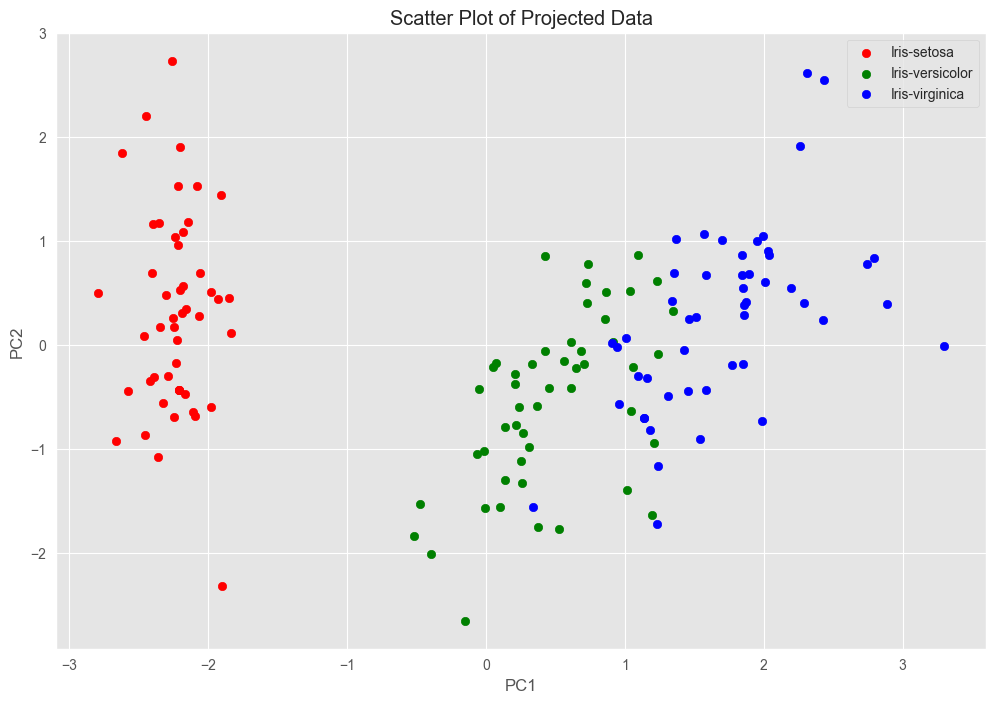

In [22]:
# Define species and corresponding colors
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

fig, ax = plt.subplots()

for i, spec in enumerate(species):
    spec_df = projected_df[projected_df['class'] == spec]
    ax.scatter(spec_df['PC1'], spec_df['PC2'], color=colors[i], label=spec)

ax.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of Projected Data')
plt.show()